# C3: BAYES THEOREM, NAÏVE BAYES, KNN

## Bayes' Theorem

- **Definition:** A rule in probability theory that describes how to update the probability of a hypothesis when new evidence is observed.  
- $\mathrm{P(A|B)}=\frac{P(B|A)P(A)}{P(B)}$
- **P(A|B):** Probability of event A given that B has happened (posterior)  
- **P(B|A):** Probability of event B given A (likelihood)  
- **P(A):** Initial probability of A (prior)  
- **P(B):** Probability of evidence B (normalizing constant)  

### Example

- A patient tests positive for a rare disease:  
- **Prior:** Only 1% of people have it → P(Disease) = 0.01  
- **Likelihood:** Test detects disease correctly 99% of the time → P(Pos|Disease) = 0.99  
- **False positive rate:** 5% → P(Pos|NoDisease) = 0.05  
- **Evidence:** Overall probability of a positive test  
- $\mathrm{P(Disease|Positive)}=\frac{0.99 \cdot 0.01}{(0.99 \cdot 0.01) + (0.05 \cdot 0.99)} \approx 0.167$  
- **Business interpretation:** Even with a positive test, the chance of actually having the disease is only about 16.7%.  

## Classifier

- An algorithm that categorizes data into classes.  
- It takes an input feature $X$ and predicts a class label $Y$.  

## Naïve Bayes Classifier

- A probabilistic classifier based on Bayes' theorem.  
- Assumes that all features are independent of each other.  
- In reality, this assumption may not always hold, hence the name *naïve*.  

### Formula

- $P(C_k \mid x_1, x_2, \dots, x_n) = \frac{P(C_k) \prod_{i=1}^n P(x_i \mid C_k)}{P(x_1, x_2, \dots, x_n)}$  

Where:  
- $C_k$: Class $k$  
- $x_1, x_2, \dots, x_n$: Features  
- $P(C_k)$: Prior probability of $C_k$  
- $P(x_i|C_k)$: Likelihood of feature $x_i$ given class $C_k$  

### Types

1. **Gaussian:** Assumes features follow a normal distribution  
2. **Multinomial:** Good for text classification  
3. **Bernoulli:** Works with binary features  

### Advantages

- Simple, fast, and easy to train  
- Works well with high-dimensional data  
- Requires less training data compared to other models  

### Limitations

- The assumption of independent features is rarely true in practice  
- If a category/feature never occurs with a class, the probability becomes zero (handled using **Laplace smoothing**)  

### Use Cases

- Spam detection  
- Sentiment analysis  
- Document classification  
- Medical diagnosis  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Example dataset
texts = [
    "Win lottery now", "Free money offer", "Congratulations you won", 
    "Claim free prize", "Cheap loans available", "Get rich quick", 
    "Lunch at 1?", "Project deadline tomorrow", "Meeting at 5", 
    "Are we on call?", "See you at dinner", "Report looks good"
]
labels = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]  # 6 spam, 6 ham

# Convert text to features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)

# Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



## K-Nearest Neighbors (KNN)

- KNN is one of the simplest algorithms in machine learning.  
- It does not build a mathematical model.  
- Instead, it memorizes the training data.  
- To classify a new point:  
  - Look at its *K* nearest neighbors.  
  - Assign the class based on the majority vote.  

### Distance Measures

Common ways to measure closeness between two data points:  
1. **Euclidean distance**  
2. **Manhattan distance**  
3. **Minkowski distance**  
4. **Cosine similarity**  

### Choice of K

1. A **small K** makes the model very sensitive, leading to **overfitting**.  
2. A **large K** makes the model smoother but may misclassify minority classes, leading to **underfitting**.  

- Usually, an odd value of K is chosen to avoid ties.  
- The optimal value of K is typically tuned using cross-validation.  

### Steps of KNN

1. Choose a value for K.  
2. Compute the distance from the new sample point to all training points.  
3. Pick the K closest points.  
4. Perform majority voting (for classification) or averaging (for regression).  

### Advantages

- Simple and easy to implement.  
- Works well for low-dimensional data.  
- No explicit training phase is required.  

### Disadvantages

- Slow for large datasets, since distances must be computed for all data points.  
- Sensitive to irrelevant features, so feature scaling is often necessary.  
- Model performance is highly dependent on the choice of K.  


In [9]:
# KNN on classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target  # features, labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Build KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



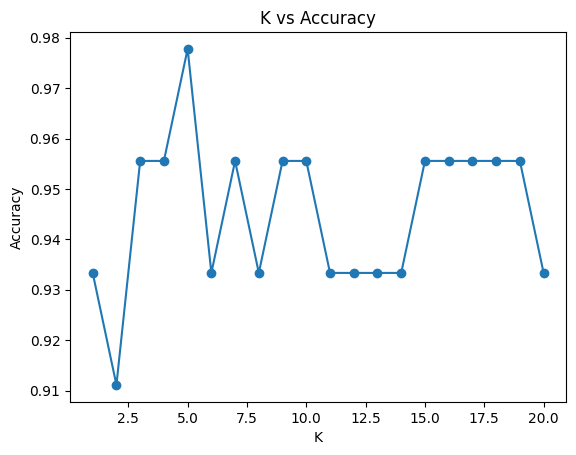

In [10]:
# Choosing optimal K
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, scores, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()
